<a href="https://colab.research.google.com/github/aryan1429/deep-learning-lab/blob/main/mlp_cifar10(w3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [8]:
#Load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


In [15]:
#Categorical or One-Hot-Encoding
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
#Build the Architecture
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(256,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
#Compile
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [25]:
#Train
history = model.fit(X_train,y_train, epochs = 30 , batch_size = 64, validation_split = 0.5)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1129 - loss: 33.3956 - val_accuracy: 0.0989 - val_loss: 2.3029
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1021 - loss: 2.3026 - val_accuracy: 0.0989 - val_loss: 2.3028
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.1046 - loss: 2.3026 - val_accuracy: 0.0987 - val_loss: 2.3028
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.0987 - loss: 2.3124 - val_accuracy: 0.0988 - val_loss: 2.3029
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3029
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0997 - loss: 2.3026 - val_accuracy: 0.0986 - val_loss: 2.3029
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.0999 - loss: 2.4855 - val_accuracy: 0.0988 - val_loss: 2.3030
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.1008 - loss: 2.3027 - val

In [26]:
#Evaluate
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0988 - loss: 2.3026


[2.302683115005493, 0.10000000149011612]

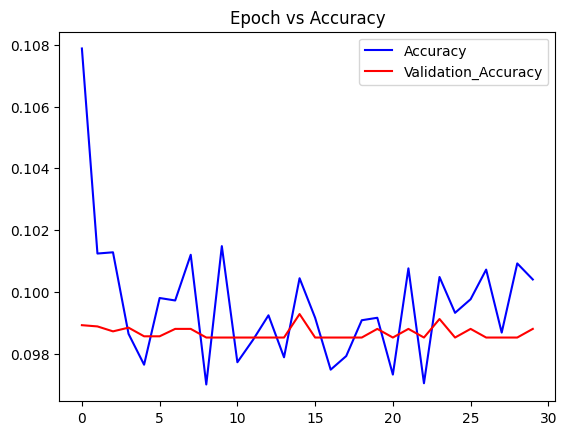

In [27]:
#Visualization
plt.plot(history.history['accuracy'], color = 'blue', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'Validation_Accuracy')
plt.legend()
plt.title("Epoch vs Accuracy")
plt.show()